# Analisis de grupos.

Compara las variables con respecto a la variable predictora para mirar ganancia de información, chi cuadrado y prueba T, según la variable.

In [1]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "3.1"

$year
[1] "2016"

$month
[1] "06"

$day
[1] "21"

$`svn rev`
[1] "70800"

$language
[1] "R"

$version.string
[1] "R version 3.3.1 (2016-06-21)"

$nickname
[1] "Bug in Your Hair"

In [15]:
library(ggplot2)
# library(MLmetrics)
# library(FactoMineR)
library(party) #install.packages("") 
library(rpart) # install.packages("ggplot2", repos='https://cloud.r-project.org')

In [16]:
entropy_y= function(y_values){
    frecs=prop.table(table(y_values))
    p_val=frecs["SI"]+1e-16# este decimal pequeño es para corregir el error logaritmo cero, da NAN y no deja avanzar
    q_val=frecs["NO"]+1e-16# este decimal pequeño es para corregir el error logaritmo cero, da NAN y no deja avanzar
    return (as.numeric(-(q_val*log2(q_val))-(p_val*log2(p_val))))}

entropy_xy=function(true_condition,reactivo){ #La formula actualizada para calcular más de dos valores
    df_dat=data.frame("true_condition"=true_condition,"reactivo"=reactivo)
    df_dat=df_dat[rowSums(!is.na(df_dat))==2,]
    entr_xy=0
    for (val in unique(df_dat$reactivo)){
        entr_y=entropy_y(df_dat[df_dat$reactivo==val,"true_condition"])
        p_val=sum(df_dat$reactivo==val)/length(df_dat$reactivo)
        entr_xy=(entr_y*p_val)+entr_xy
    }
    return (entr_xy)
}    
info_gain=function(true_condition,reactivo){entropy_y(true_condition)-entropy_xy(true_condition,reactivo)}

In [17]:
cuestionario_1=read.csv(file="SOLO IVIC.csv", header = F, encoding="UTF-8", row.names=1)
print(paste("Archivo de datos cargado ", nrow(cuestionario_1)," filas y ",ncol(cuestionario_1),"columnas"))
variables_1=read.csv("vars.csv", header=T)
print(paste("Archivo variables cargado ", nrow(variables_1)," filas y ",ncol(variables_1),"columnas"))
colnames(cuestionario_1)=variables_1$ident
#row.names(cuestionario_1)=cuestionario_1$INTERNO
variables_1$procesar=as.logical(variables_1$procesar)

cuestionario_1$var_35=as.Date(as.character.factor(cuestionario_1$var_35),format = "%m/%d/%Y")

[1] "Archivo de datos cargado  27944  filas y  314 columnas"
[1] "Archivo variables cargado  314  filas y  4 columnas"


In [18]:
## Separar variables a procesar, de las que no.
cuestionario_2=cuestionario_1[,variables_1$procesar]

variables_2=variables_1[variables_1$procesar,1:3]
 # variables_2$tipo[5]="CATEGORICA" # la variable reincidenciareco es la variable dependiente
##

for (i in 1:ncol(cuestionario_2)){
    if(variables_2$tipo[i]=="CATEGORICA"){
#         cuestionario_2[is.na(cuestionario_2[,i]),i]=9999
        cuestionario_2[,i]=factor(cuestionario_2[,i])
    }else{
        cuestionario_2[,i]=as.numeric(cuestionario_2[,i])
    }
}
cuestionario_2$var_5=factor(cuestionario_1$var_5, labels=c("NO","SI"))
cuestionario_3=cuestionario_2[!colnames(cuestionario_2)=="var_5"]
cuestionario_3=data.frame("REINCIDENCIARECO"=cuestionario_2$var_5,cuestionario_3)
print(paste("Variables a procesar separadas y transformados sus valores. Forma final del cuestionario:", list(dim(cuestionario_3))))

str(cuestionario_3)

[1] "Variables a procesar separadas y transformados sus valores. Forma final del cuestionario: c(27944, 168)"
'data.frame':	27944 obs. of  168 variables:
 $ REINCIDENCIARECO: Factor w/ 2 levels "NO","SI": 2 2 1 2 1 1 1 1 1 1 ...
 $ var_6           : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ var_7           : num  NA 3 NA 2 NA NA 3 NA 2 2 ...
 $ var_8           : Factor w/ 8 levels "0","1","2","3",..: 2 1 6 6 2 2 6 1 1 6 ...
 $ var_9           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ var_10          : num  0 3 4 4 4 3 4 4 3 3 ...
 $ var_11          : num  1 0 1 0 0 0 0 0 0 0 ...
 $ var_12          : num  24 37 47 48 31 37 40 45 28 32 ...
 $ var_13          : num  2 1 3 1 1 1 5 1 1 1 ...
 $ var_14          : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 2 1 1 1 ...
 $ var_15          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ var_16          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ var_17          : Factor w/ 2 levels "0","1": 1 1 1 1 

In [19]:
# cuestionario_3b=cuestionario_3
# # table(rowSums(is.na(cuestionario_3))==0)
# table(cuestionario_3$REINCIDENCIARECO)
# summary(cuestionario_3$REINCIDENCIARECO)
dim(cuestionario_1)

tbl=table(
cuestionario_3$var_8==7
);print(tbl)
prop.table(tbl)


[1] 27944   314


FALSE  TRUE 
27942     2 



       FALSE         TRUE 
9.999284e-01 7.157171e-05 

In [20]:
# cuestionario_3=cuestionario_3b
################
cuestionario_3=cuestionario_3[cuestionario_1$var_35<as.Date("12/31/2012",format = "%m/%d/%Y"),] # eliminar registros posteriores a 2012
cuestionario_3=cuestionario_3[cuestionario_3$var_12>17&
                              cuestionario_3$var_12<66,
                              1:ncol(cuestionario_3)]# rango limitado de edad

cuestionario_3=cuestionario_3[cuestionario_3$var_6==1,
                              1:ncol(cuestionario_3)]#Solo hombres

cuestionario_3=cuestionario_3[,c(1,3:ncol(cuestionario_3))]# Se elimina la variable género

cuestionario_3$var_7[is.na(cuestionario_3$var_7)]=0# Na's Se reemplazan por cero hijos
cuestionario_3=cuestionario_3[cuestionario_3$var_7<13,
                              1:ncol(cuestionario_3)]# Menos de 13 hijos

cuestionario_3=cuestionario_3[!(cuestionario_3$var_8==7),
                              1:ncol(cuestionario_3)]# Eliminar los religiosos

# Unificar estado civil
cuestionario_3$var_8[cuestionario_3$var_8==0]=1 # sin datos se pasó a soltero como valor por defecto
cuestionario_3$var_8[cuestionario_3$var_8==4]=3 # Divorciado se pasó a separado
cuestionario_3$var_8[cuestionario_3$var_8==6]=3 # Viudo se pasó a separado

variables_2=variables_2[c(1,3:nrow(variables_2)),]# se elimina la variable género por quedar solo hombres
###############

# cuestionario_3=cuestionario_3[rowSums(is.na(cuestionario_3))==0,]# Eliminar los casos con datos vacíos
summary(cuestionario_3$REINCIDENCIARECO)

NO    SI 
10781 10286

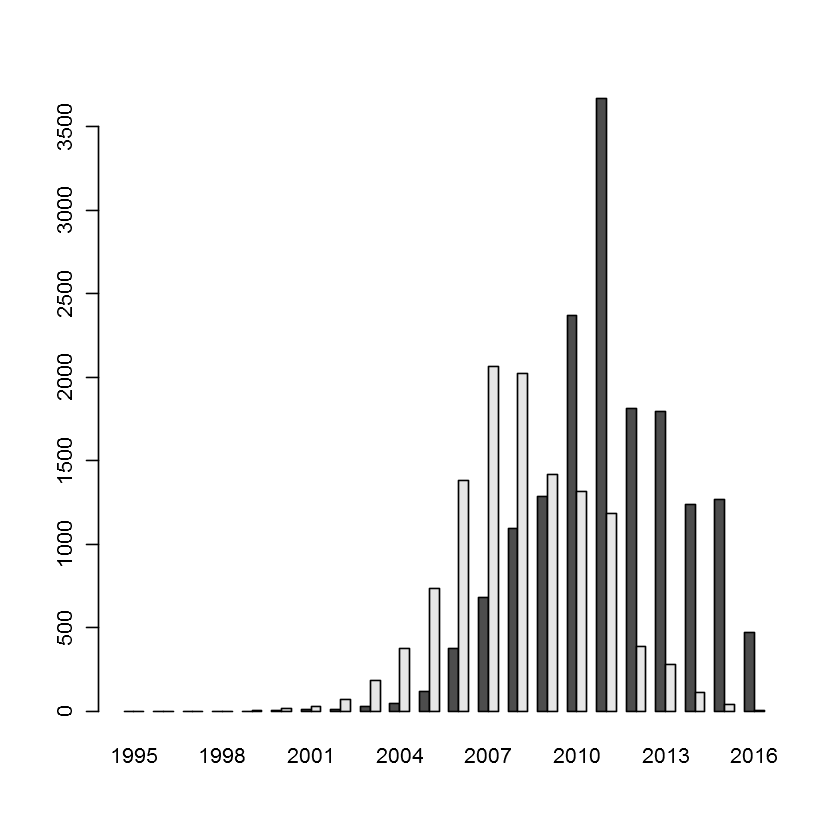

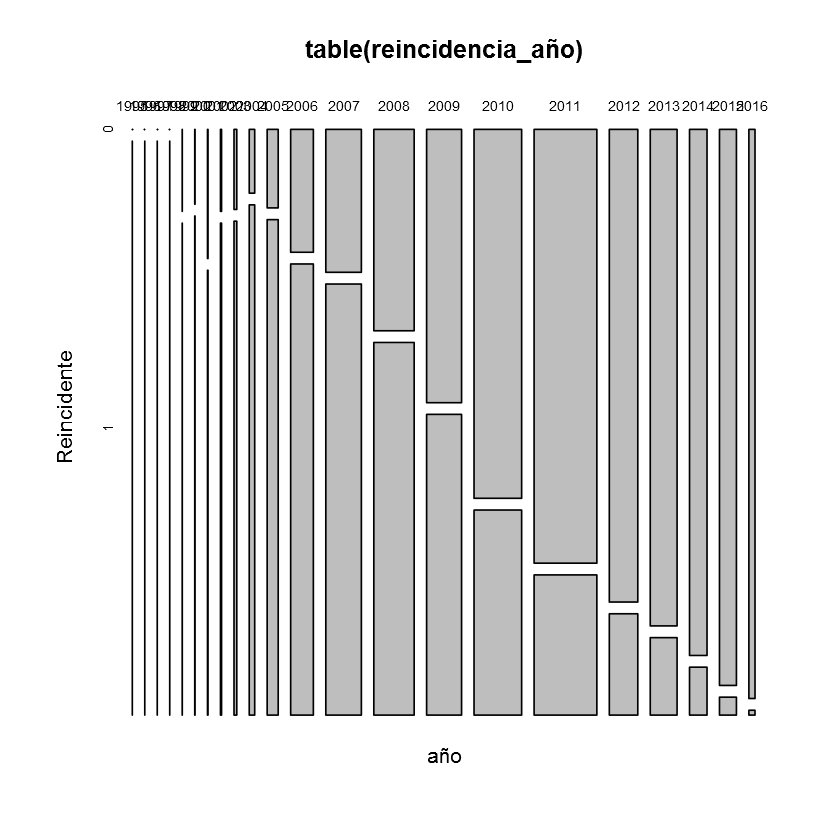

In [21]:
reincidencia_año=data.frame(año=as.numeric(format(as.Date(cuestionario_1$var_35),"%Y")),Reincidente=cuestionario_1$var_5)
barplot(
    t(
        table(reincidencia_año)
    ),beside=T
)
plot(table(reincidencia_año))
# summary(as.numeric(format(as.Date(cuestionario_1$var_35),"%Y")))


In [22]:
tbl_df=data.frame(table(reincidencia_año))
reincid_año=data.frame(rowSums(table(reincidencia_año)))
reincid_año$no_rein= tbl_df[tbl_df$Reincidente==0,]$Freq
reincid_año$si_rein= tbl_df[tbl_df$Reincidente==1,]$Freq
reincid_año$no_rein_cumsum=cumsum(tbl_df[tbl_df$Reincidente==0,]$Freq)
reincid_año$si_rein_cumsum=cumsum(tbl_df[tbl_df$Reincidente==1,]$Freq)
colnames(reincid_año)[1]="n_internos"
reincid_año$n_internos_cumsum=cumsum(reincid_año$n_internos)

reincid_año

,n_internos,no_rein,si_rein,no_rein_cumsum,si_rein_cumsum,n_internos_cumsum
1995,1,0,1,0,1,1
1996,1,0,1,0,2,2
1997,2,0,2,0,4,4
1998,2,0,2,0,6,6
1999,7,1,6,1,12,13
2000,23,3,20,4,32,36
2001,40,9,31,13,63,76
2002,84,12,72,25,135,160
2003,215,30,185,55,320,375
2004,423,47,376,102,696,798


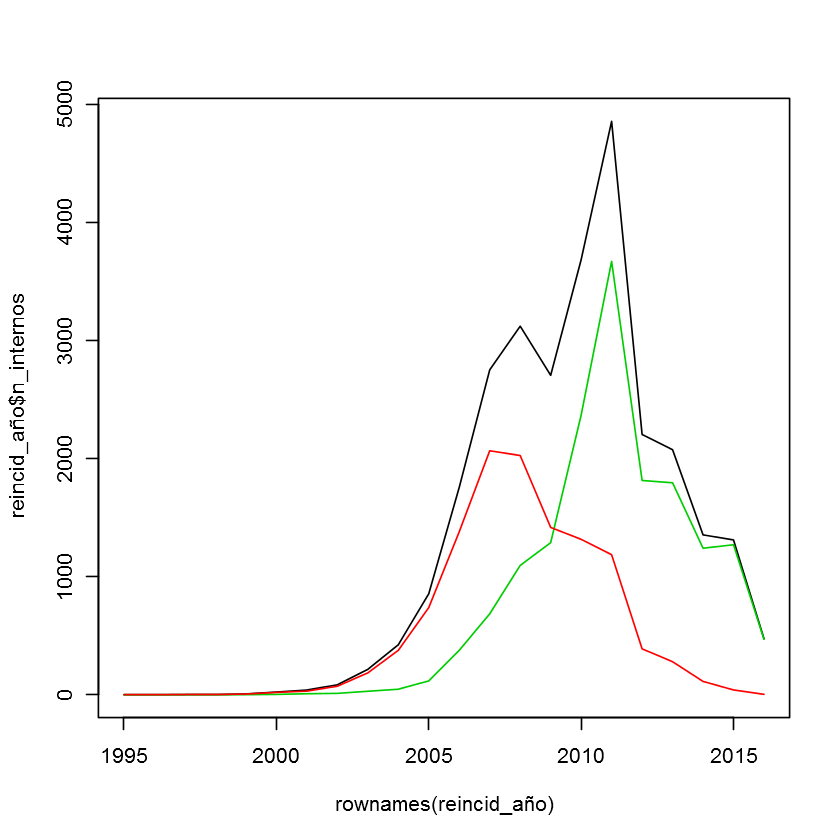

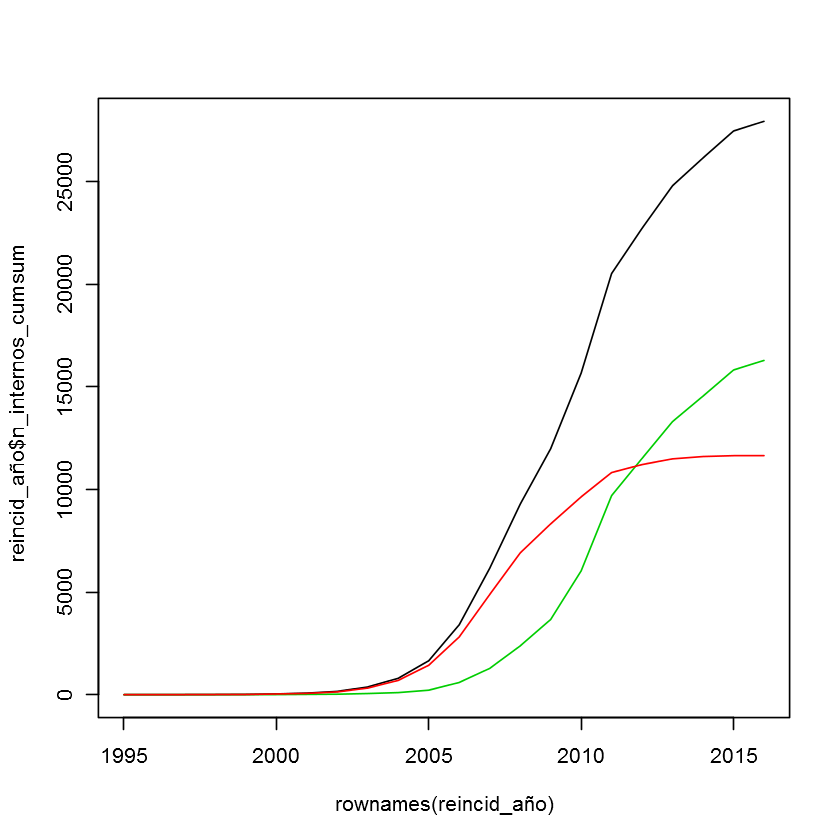

In [23]:
plot(rownames(reincid_año),reincid_año$n_internos, type="l")#, col=1,ylim=c(0,30000))
lines(rownames(reincid_año),reincid_año$no_rein, col=3)
lines(rownames(reincid_año),reincid_año$si_rein, col=2)

plot(rownames(reincid_año),reincid_año$n_internos_cumsum, type="l")#, col=1,ylim=c(0,30000))
lines(rownames(reincid_año),reincid_año$no_rein_cumsum, col=3)
lines(rownames(reincid_año),reincid_año$si_rein_cumsum, col=2)



[1] "variable*** 2"
[1] "Identificador de la variable*** var_7"
[1] "Nombre variable*** N_HIJOS"
[1] "var_7"
[1] RAZON
Levels:  CATEGORICA RAZON
[1] "prueba t 0.000631212369557173"
[1] "Si existen diferencias"
[1] "variable*** 3"
[1] "Identificador de la variable*** var_8"
[1] "Nombre variable*** ESTADO_CIVIL"
[1] "var_8"
[1] CATEGORICA
Levels:  CATEGORICA RAZON
[1] "info Gain 0.00433061320430017"


Warning message:
In chisq.test(table(cuestionario_3$REINCIDENCIARECO, cuestionario_3[, : Chi-squared approximation may be incorrect

[1] "prueba chi 0.99"
[1] "No existen diferencias"
[1] "variable*** 4"
[1] "Identificador de la variable*** var_9"
[1] "Nombre variable*** REALIZO_ACTIVIDAD"
[1] "var_9"
[1] CATEGORICA
Levels:  CATEGORICA RAZON
[1] "info Gain 9.85697620081716e-07"
[1] "prueba chi 0.975423538639399"
[1] "No existen diferencias"
[1] "variable*** 5"
[1] "Identificador de la variable*** var_10"
[1] "Nombre variable*** CALIFICACION"
[1] "var_10"
[1] RAZON
Levels:  CATEGORICA RAZON
[1] "prueba t 4.37559731833179e-159"
[1] "Si existen diferencias"
[1] "variable*** 6"
[1] "Identificador de la variable*** var_11"
[1] "Nombre variable*** SANCIONES"
[1] "var_11"
[1] RAZON
Levels:  CATEGORICA RAZON
[1] "prueba t 1.97875995103942e-52"
[1] "Si existen diferencias"
[1] "variable*** 7"
[1] "Identificador de la variable*** var_12"
[1] "Nombre variable*** EDAD_INGRESO"
[1] "var_12"
[1] RAZON
Levels:  CATEGORICA RAZON
[1] "prueba t 5.03478367004115e-147"
[1] "Si existen diferencias"
[1] "variable*** 8"
[1] "Identificador

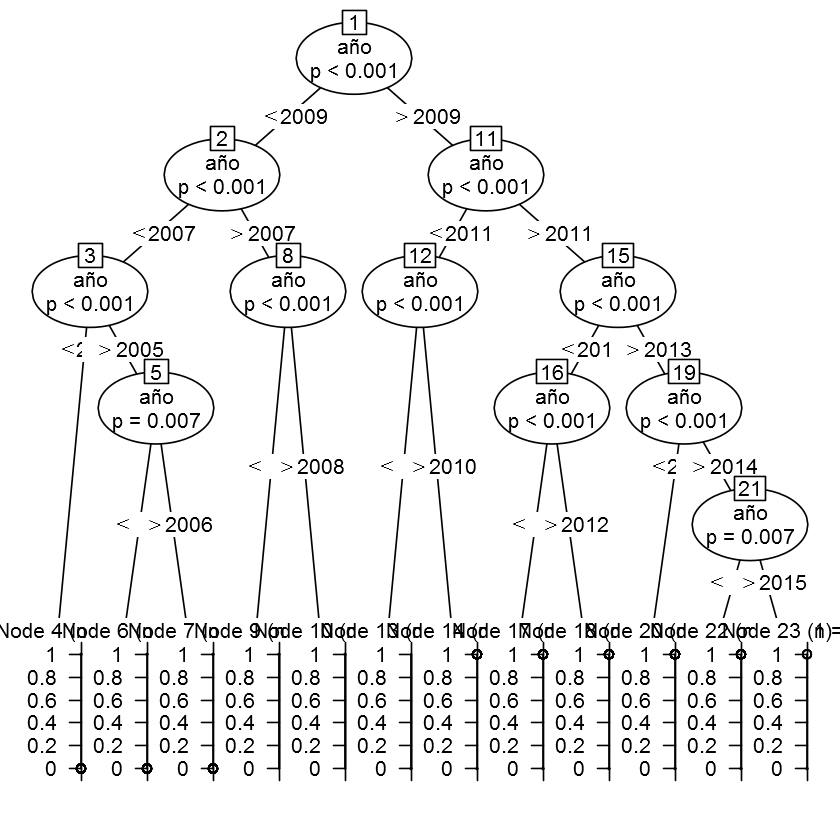

In [24]:
tree_dat=ctree(Reincidente ~ año, data=reincidencia_año)
plot(tree_dat)
# reincidencia_año

results=data.frame("ident"=rep(NA,ncol(cuestionario_3)),
                   "nom_var"=rep(NA,ncol(cuestionario_3)),
                   "info_gain"=rep(NA,ncol(cuestionario_3)),
                   "chisq"=rep(NA,ncol(cuestionario_3)),
                   "t_test"=rep(NA,ncol(cuestionario_3)),
                   "decis"=rep(NA,ncol(cuestionario_3))
)
for(i in 2:ncol(cuestionario_3)){
    print (paste("variable***",i))
    ident_var=variables_2[variables_2$ident==colnames(cuestionario_3)[i],"ident"]
    print(paste("Identificador de la variable***",ident_var))
    results$ident[i]=as.character(ident_var)
    nombr_var=variables_2[variables_2$ident==colnames(cuestionario_3)[i],"nombre"]
    print(paste("Nombre variable***",nombr_var))
    results$nom_var[i]=as.character(nombr_var)
    print(colnames(cuestionario_3)[i])
    tipo_var=variables_2[variables_2$ident==colnames(cuestionario_3)[i],"tipo"]
    decis=NULL

    if(tipo_var=="CATEGORICA"){
        print(tipo_var)
        info_gain_var=info_gain(cuestionario_3$REINCIDENCIARECO,cuestionario_3[,i])
        print(paste("info Gain",info_gain_var))
        results$info_gain[i]=info_gain_var
        test_var=chisq.test(table(cuestionario_3$REINCIDENCIARECO,cuestionario_3[,i]))
        valor_p_chi=test_var$p.value
        if (valor_p_chi=="NaN"){valor_p_chi=0.99}
        results$chisq[i]=valor_p_chi
#         fisher_test_var=fisher.test(table(cuestionario_3$REINCIDENCIARECO,cuestionario_3[,i]))
#         fisher_valor_p=round(test_var$p.value,2)
        print(paste("prueba chi",valor_p_chi))
#         print(paste("prueba fisher",fisher_valor_p))
        if (valor_p_chi<0.05){
            decis="Si existen diferencias"
            if(info_gain_var>0.003){results$decis[i]=2}else{results$decis[i]=1}
        }else{
            decis="No existen diferencias"
            results$decis[i]=0
        }
    }else{
        print(tipo_var)
        t_test=t.test(cuestionario_3[,i]~cuestionario_3$REINCIDENCIARECO,var.equal=T)
        valor_p=t_test$p.value
        results$t_test[i]=valor_p
        print(paste("prueba t",valor_p))
        if (valor_p<0.05){
            decis="Si existen diferencias"
            results$decis[i]=1
        }else{
            decis="No existen diferencias"
            results$decis[i]=0
        }
    }
    print (decis)
}


 [1]  0  3  2  1  4  6  5  9  8  7 11 10 12
[1] 0 3 4 2 1


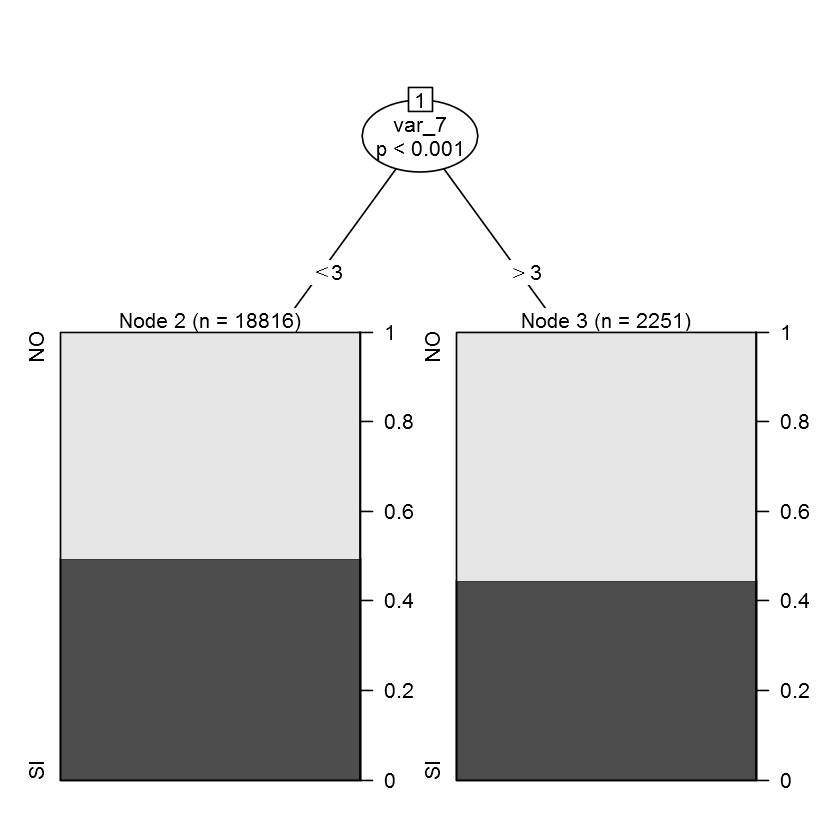

 [1]  1  0  4  2  7  3  5  8 12  6 10 14  9 11 16 13 17 27 15 18


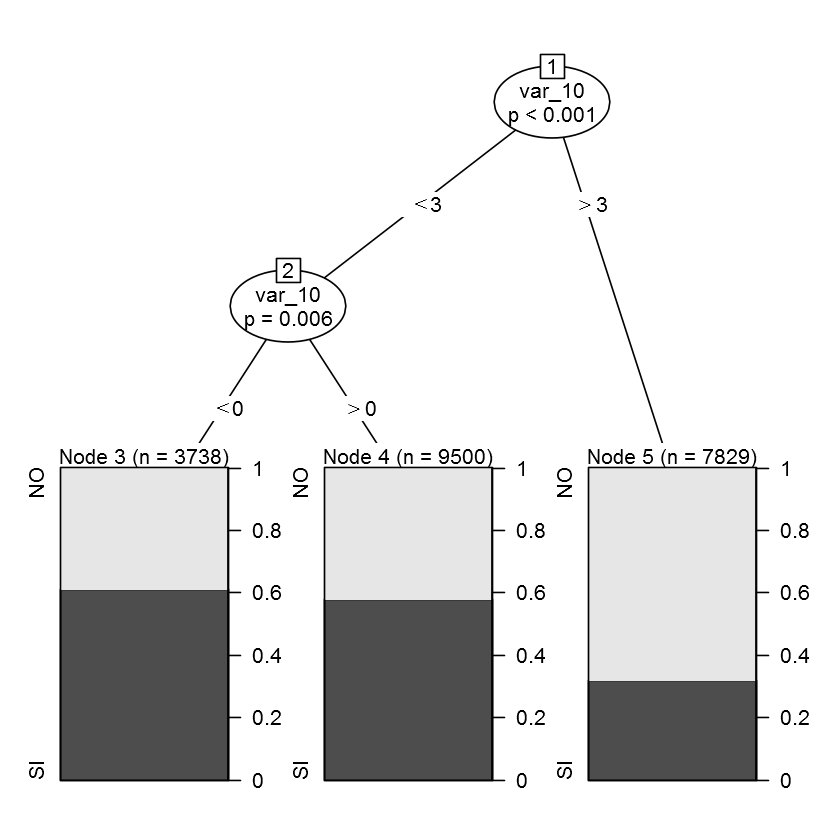

 [1] 24 37 48 31 28 34 26 61 53 47 32 25 23 44 38 40 36 35 29 30 22 54 33 39 42
[26] 45 27 41 46 43 51 20 58 21 18 19 49 62 52 60 57 50 65 59 56 55 64 63


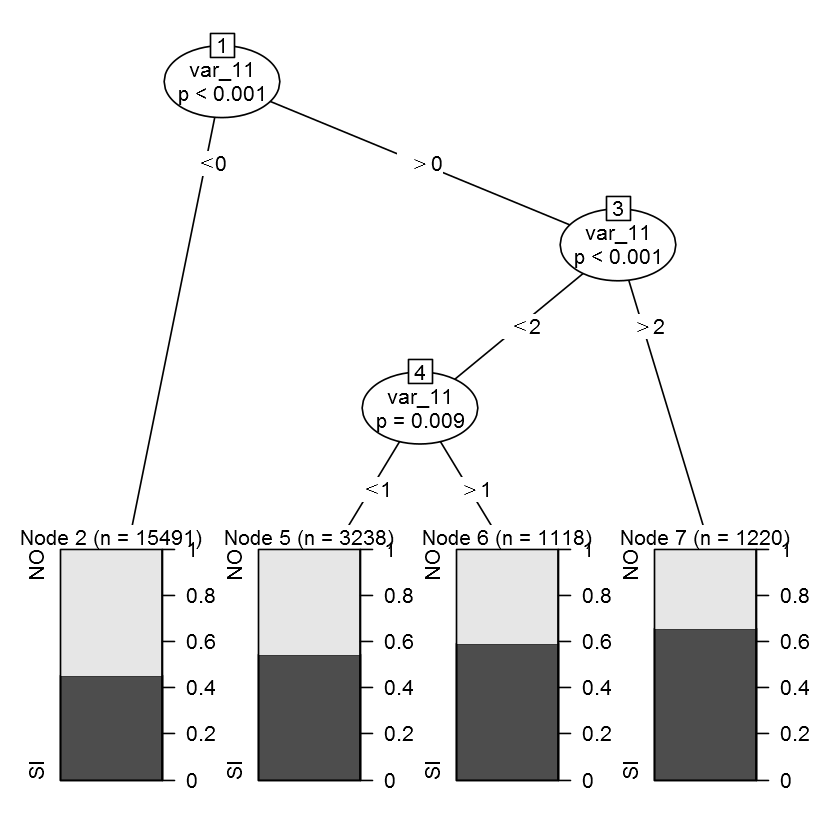

 [1]  2  1  4  3  5  6  8  9  7 11 10 13 12 14


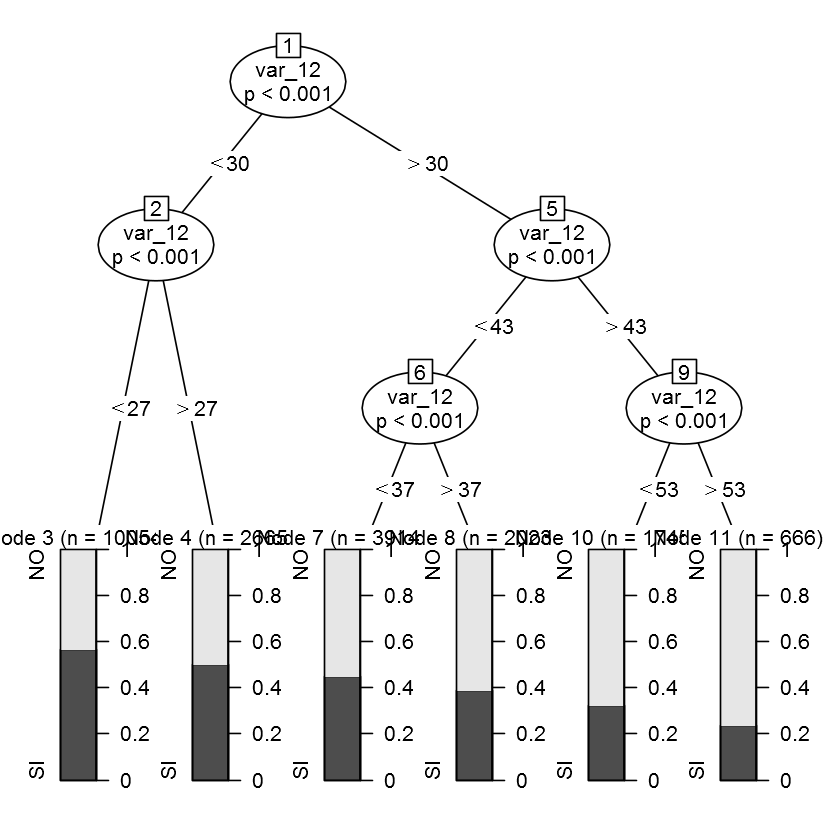

[1] 0 1 2 3 5 4 7 6 8


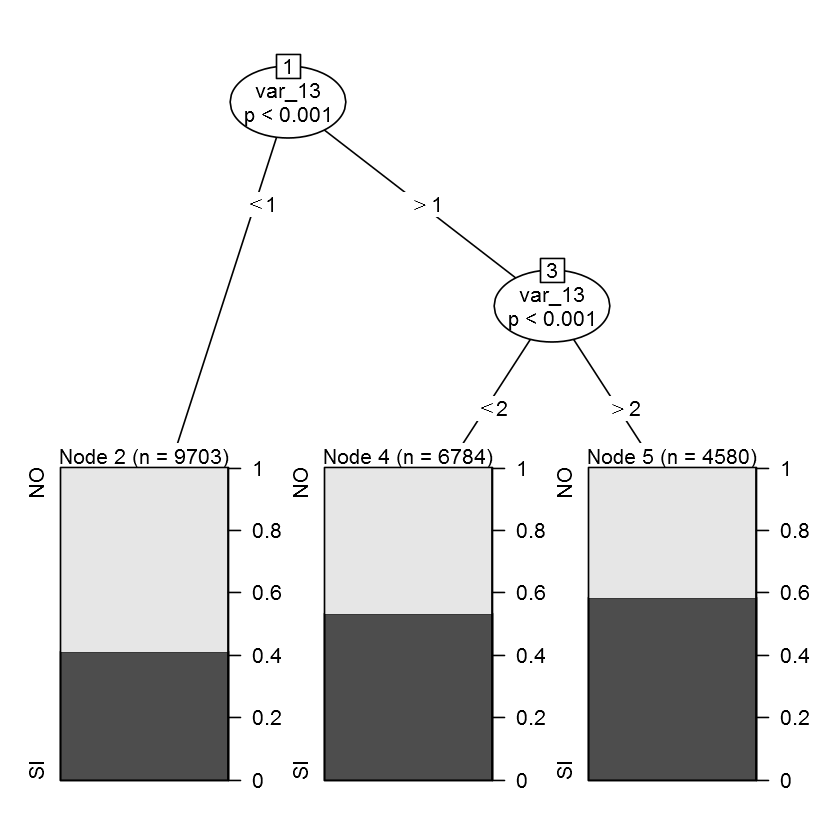

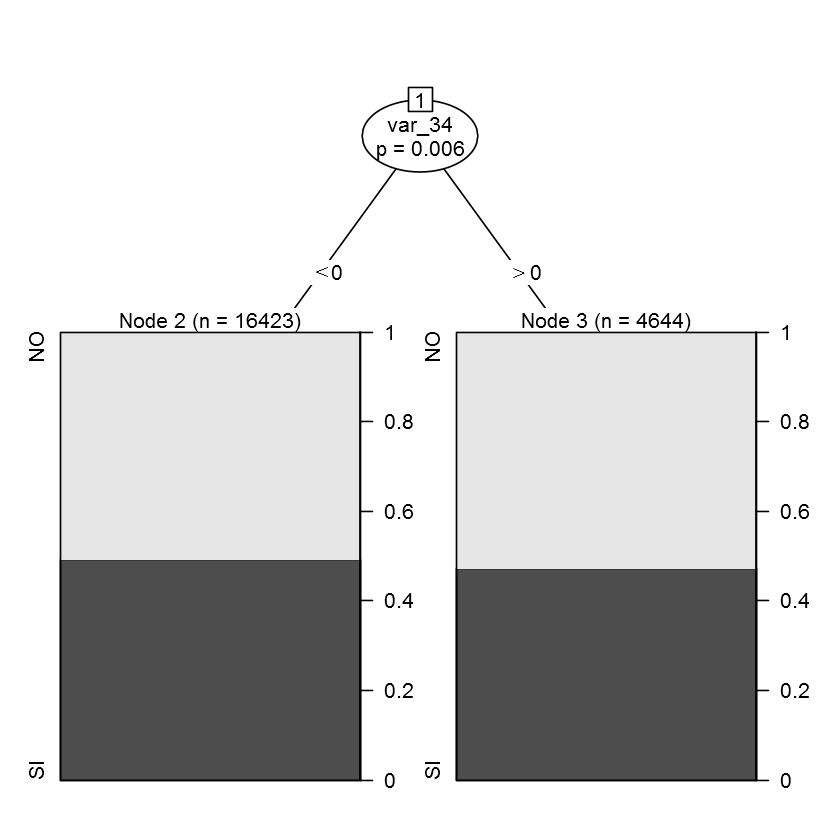

In [25]:
tree_dat=ctree(REINCIDENCIARECO ~ var_7, data=cuestionario_3)
print(unique(cuestionario_3$var_7))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)

tree_dat=ctree(REINCIDENCIARECO ~ var_10, data=cuestionario_3)
print(unique(cuestionario_3$var_10))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)

tree_dat=ctree(REINCIDENCIARECO ~ var_11, data=cuestionario_3)
print(unique(cuestionario_3$var_11))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)

tree_dat=ctree(REINCIDENCIARECO ~ var_12, data=cuestionario_3)
print(unique(cuestionario_3$var_12))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)

tree_dat=ctree(REINCIDENCIARECO ~ var_13, data=cuestionario_3)
print(unique(cuestionario_3$var_13))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)

tree_dat=ctree(REINCIDENCIARECO ~ var_34, data=cuestionario_3)
print(unique(cuestionario_3$var_34))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)

In [ ]:
cuestionario_4=cuestionario_3
cuestionario_4$var_7 =factor((cuestionario_4$var_7 >3)*1)
cuestionario_4$var_10=factor((cuestionario_4$var_10>3)*1)
cuestionario_4$var_11=factor((cuestionario_4$var_11>0)*1)
cuestionario_4$var_12=factor((cuestionario_4$var_12>30)*1)
cuestionario_4$var_13=factor((cuestionario_4$var_13>1)*1)
cuestionario_4$var_34=factor((cuestionario_4$var_34>0)*1)
str(cuestionario_4)

rownames(results)=colnames(cuestionario_3)
results
# hist(results$info_gain, col="gray75")


In [ ]:
results_2=data.frame(#"ident"=rep(NA,ncol(cuestionario_4)),
                   "nom_var"=rep(NA,ncol(cuestionario_4)),
                   "info_gain"=rep(NA,ncol(cuestionario_4)),
                   "chisq"=rep(NA,ncol(cuestionario_4)),
                   "decis"=rep(NA,ncol(cuestionario_4))
)

In [ ]:
for(i in 2:ncol(cuestionario_4)){
#     ident_var=variables_2[variables_2$ident==colnames(cuestionario_4)[i],"ident"]
#     results_2$ident[i]=as.character(ident_var)
    nombr_var=variables_2[variables_2$ident==colnames(cuestionario_4)[i],"nombre"]
    results_2$nom_var[i]=as.character(nombr_var)
    decis=NULL
    info_gain_var=info_gain(cuestionario_4$REINCIDENCIARECO,cuestionario_4[,i])
    results_2$info_gain[i]=info_gain_var
    f1_var=F1_Score((cuestionario_4$REINCIDENCIARECO=="SI")*1,(cuestionario_4[,i]=="1")*1)
    test_var=chisq.test(table(cuestionario_4$REINCIDENCIARECO,cuestionario_4[,i]))
    valor_p_chi=test_var$p.value
    if (valor_p_chi=="NaN"){valor_p_chi=0.99}
    results_2$chisq[i]=valor_p_chi
    if (valor_p_chi<0.05){
        decis="Si existen diferencias"
        if(info_gain_var>0.003){results_2$decis[i]=2}else{results_2$decis[i]=1}
    }else{
        decis="No existen diferencias"
        results_2$decis[i]=0
    }
}

rownames(results_2)=colnames(cuestionario_4)

plot(results_2$chisq, results_2$info_gain, pch=16, col=results_2$decis+2)

In [ ]:
rownames(results_2)=colnames(cuestionario_4)

plot(results_2$chisq, results_2$info_gain, pch=16, col=results_2$decis+2)


In [1]:
# write.csv(cuestionario_4,file="cuestionario_4.csv")
# write.csv(cuestionario_3,file="cuestionario_3.csv")
# write.csv(variables_2,file="variables_2.csv")
# write.csv(results_2,file="results.csv")


In [3]:
cuestionario_4=read.csv(file="cuestionario_4.csv", header=T)#, stringsAsFactors=F)#, row.names=1
variables_2=read.csv(file="variables_2.csv", header=T, row.names=1)
results_2=read.csv(file="results.csv", header=T, row.names=1)

best_predicts=read.csv("best_predicts.csv", header=T, row.names=1)
df_results=read.csv("results_hot.csv", header=T, row.names=1)
predicts_dat=read.csv("predicts.csv", header=T, row.names=1)

for (i in c(1:length(colnames(predicts_dat)))){
    predicts_dat[,i]=factor(predicts_dat[,i])
}
str(predicts_dat)


'data.frame':	21067 obs. of  14 variables:
 $ REINCIDENCIARECO: Factor w/ 2 levels "NO","SI": 2 2 2 1 1 1 1 1 2 2 ...
 $ var_10          : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 1 2 1 ...
 $ var_12          : Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 1 1 1 ...
 $ var_13          : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 2 2 1 ...
 $ var_14          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ var_175         : Factor w/ 2 levels "1","2": 2 2 1 1 2 2 2 2 1 2 ...
 $ var_189         : Factor w/ 2 levels "1","2": 2 1 1 1 2 2 2 1 2 2 ...
 $ var_254         : Factor w/ 2 levels "1","2": 2 2 2 2 2 1 2 2 2 2 ...
 $ var_27          : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 1 2 1 1 ...
 $ var_176_1       : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 2 1 ...
 $ var_203_1       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ var_212_1       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ var_217_3       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 2 1 ...
 $ var

In [4]:

predicts_dat$var_10    =factor(predicts_dat$var_10,    labels=c("Menor que Ejemplar", "Ejemplar"))
predicts_dat$var_12    =factor(predicts_dat$var_12,    labels=c("30 o Menos", "Mayor a 30"))
predicts_dat$var_13    =factor(predicts_dat$var_13,    labels=c("Uno", "Mas de Uno"))
predicts_dat$var_14    =factor(predicts_dat$var_14,    labels=c("NO", "SI"))
predicts_dat$var_175   =factor(predicts_dat$var_175,   labels=c("NO", "SI"))
predicts_dat$var_189   =factor(predicts_dat$var_189,   labels=c("NO", "SI"))
predicts_dat$var_254   =factor(predicts_dat$var_254,   labels=c("NO", "SI"))
predicts_dat$var_27    =factor(predicts_dat$var_27,    labels=c("NO", "SI"))
predicts_dat$var_176_1 =factor(predicts_dat$var_176_1, labels=c("Alguna SPA", "Ninguna"))
predicts_dat$var_203_1 =factor(predicts_dat$var_203_1, labels=c("Por una causa","Niega cometer el delito"))
predicts_dat$var_212_1 =factor(predicts_dat$var_212_1, labels=c("Individual/Conjunto","Niega cometer el delito"))
predicts_dat$var_217_3 =factor(predicts_dat$var_217_3, labels=c("SI/NO", "No Consume"))
predicts_dat$var_203_3 =factor(predicts_dat$var_203_3, labels=c("NO", "SI"))

varnames=c("REINCIDENCIARECO",# REINCIDENCIARECO
           "Calificacion",#var_10 
           "Edad 1er Ingreso",#var_12
           "Numero de Delitos",#var_13
           "Homicidio",#var_14
           "Consumo alguna vez SPA",#var_175  
           "Forma Vida Delictiva",#var_189 
           "Confesó el delito",#var_254 
           "Hurto",#var_27
           "Tipo de SPA consumida",#var_176_1
           "Motivación del Delito",#var_203_1
           "Cometió delito con",#var_212_1
           "Violar la Ley Bajo SPA",#var_217_3
           "Delito por Circunstancias "#var_203_3
          )
colnames(predicts_dat)=varnames


In [11]:
log_reg_model <- glm(REINCIDENCIARECO ~.,family=binomial(link='logit'),data=predicts_dat)
summary(log_reg_model)

names(log_reg_model)


Call:
glm(formula = REINCIDENCIARECO ~ ., family = binomial(link = "logit"), 
    data = predicts_dat)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9944  -0.9469  -0.4233   0.9378   2.4861  

Coefficients:
                                               Estimate Std. Error z value
(Intercept)                                    -0.61996    0.07868  -7.879
CalificacionEjemplar                           -0.87301    0.03323 -26.268
`Edad 1er Ingreso`Mayor a 30                   -0.08310    0.03446  -2.411
`Numero de Delitos`Mas de Uno                   0.50574    0.03404  14.856
HomicidioSI                                    -0.67646    0.04337 -15.596
`Consumo alguna vez SPA`SI                      0.01083    0.05164   0.210
`Forma Vida Delictiva`SI                        0.47299    0.03852  12.278
`Confesó el delito`SI                           0.37512    0.04696   7.988
HurtoSI                                         0.96950    0.03438  28.196
`Tipo de SPA cons

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "na.action"         "call"              "formula"          
[25] "terms"             "data"              "offset"           
[28] "control"           "method"            "contrasts"        
[31] "xlevels"

In [12]:
tree_dat_sel=ctree(REINCIDENCIARECO ~.,
               data=predicts_dat)

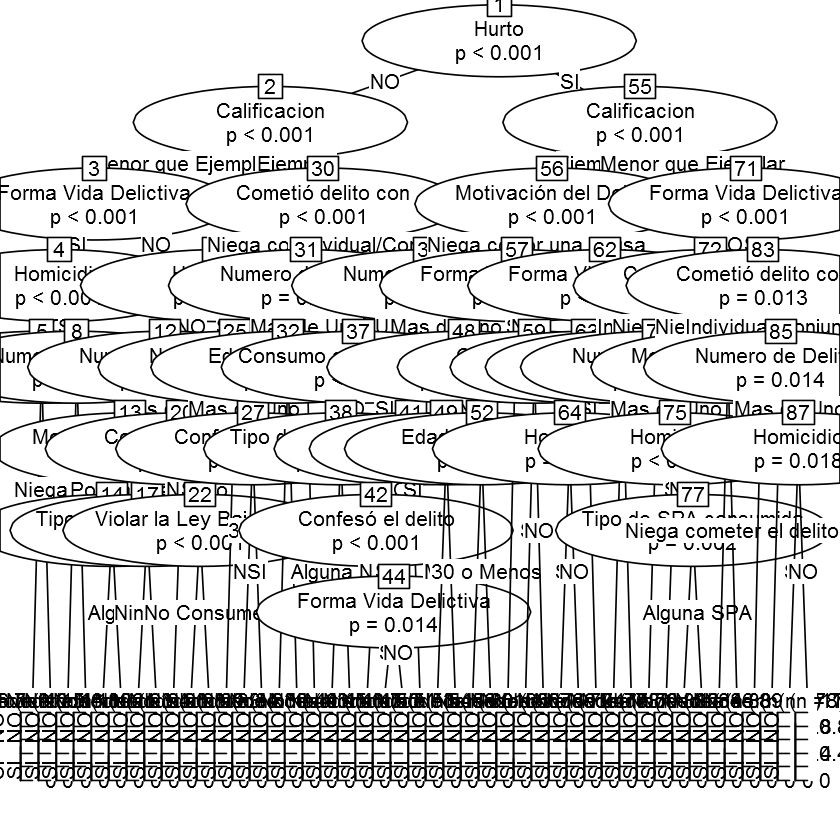

In [13]:
# jpeg(filename="arbol_select.jpg",width = 3500, height = 1200, units = "px",quality = 90)
plot(tree_dat_sel)
# dev.off()


"REINCIDENCIARECO",# REINCIDENCIARECO

"Calificacion",#var_10 

"Edad 1er Ingreso",#var_12

"Numero de Delitos",#var_13

"Homicidio",#var_14

"Consumo alguna vez SPA",#var_175  

"Forma Vida Delictiva",#var_189 

"Confesó el delito",#var_254 

"Hurto",#var_27

"Tipo de SPA consumida",#var_176_1

"Motivación del Delito",#var_203_1

"Cometió delito con",#var_212_1

"Violar la Ley Bajo SPA",#var_217_3

"Delito por Circunstancias "#var_203_3


In [30]:
cuest_5=cuestionario_3[c("REINCIDENCIARECO","var_10","var_12")]
colnames(cuest_5)=c("REINCIDENCIARECO","Calificación")

 [1]  0  3  2  1  4  6  5  9  8  7 11 10 12


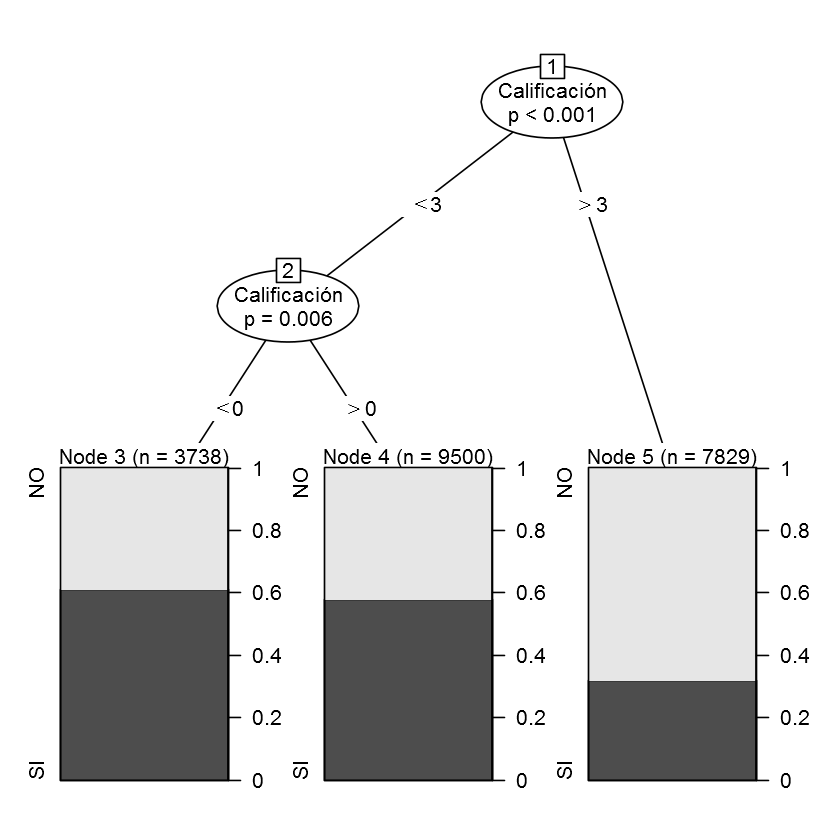

In [31]:
tree_dat=ctree(REINCIDENCIARECO ~ Calificación, data=cuest_5)
print(unique(cuestionario_3$var_7))
plot(tree_dat)
# table(cuestionario_3$REINCIDENCIARECO)